In [27]:
pwd

'/home/wsuser/work'

In [28]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EaJyGGLhVby4Qc63slLijIkieLMCOQ9y1W6TpBisD0iI',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'classificationofarrhythmiabyusing-donotdelete-pr-eqb6rjoo52bv9f'
object_key = 'Classification of Arrhythmia by Using Deep Learning with 2-D ECG Spectral Image Representation.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [29]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [30]:
ls

data/


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [33]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [34]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/data/test",target_size=(64,64),
                                                            class_mode="categorical",batch_size=32)

Found 6825 images belonging to 6 classes.


In [35]:

x_test=test_datagen.flow_from_directory(r"/home/wsuser/work/data/train",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 15341 images belonging to 6 classes.


In [36]:
x_train.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}

**CREATE** **MODEL**

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [39]:
from tensorflow.keras.datasets import mnist

In [40]:
model=Sequential()

**Add** **Layers** (**Convolution**,**MaxPooling**,**Flatten**,**Dense**-(**Hidden** **Layers**),**Output**)

In [41]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [42]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [43]:
model.add(Flatten())

In [44]:
model.add(Dense(300,activation='relu'))

In [45]:
model.add(Dense(5,activation="softmax"))

In [46]:
model.add(Dense(units=128,kernel_initializer="random_uniform",activation="relu"))

In [47]:
model.add(Dense(units=128,kernel_initializer="random_uniform",activation="relu"))

In [48]:
model.add(Dense(units=128,kernel_initializer="random_uniform",activation="relu"))

In [49]:
model.add(Dense(units=128,kernel_initializer="random_uniform",activation="relu"))

In [50]:
model.add(Dense(units=128,kernel_initializer="random_uniform",activation="relu"))

In [51]:
model.add(Dense(units=6,kernel_initializer="random_uniform",activation="softmax"))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 5)                 1505      
                                                                 
 dense_2 (Dense)             (None, 128)               768       
                                                        

**Compile** **The** **Model**

In [53]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [54]:
len(x_train)

214

In [56]:
model.fit(x_train,epochs=9,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/9
214/214 [==============================] - 67s 312ms/step - loss: 1.5812 - accuracy: 0.3193 - val_loss: 1.5295 - val_accuracy: 0.4788
Epoch 2/9
214/214 [==============================] - 65s 303ms/step - loss: 1.5814 - accuracy: 0.3193 - val_loss: 1.5011 - val_accuracy: 0.4788
Epoch 3/9
214/214 [==============================] - 64s 300ms/step - loss: 1.5803 - accuracy: 0.3193 - val_loss: 1.5137 - val_accuracy: 0.4788
Epoch 4/9
214/214 [==============================] - 65s 304ms/step - loss: 1.5804 - accuracy: 0.3193 - val_loss: 1.5101 - val_accuracy: 0.4788
Epoch 5/9
214/214 [==============================] - 65s 306ms/step - loss: 1.5804 - accuracy: 0.3193 - val_loss: 1.5273 - val_accuracy: 0.4788
Epoch 6/9
214/214 [==============================] - 65s 306ms/step - loss: 1.5803 - accuracy: 0.3193 - val_loss: 1.5225 - val_accuracy: 0.4788
Epoch 7/9
214/214 [==============================] - 64s 300ms/step - loss: 1.5804 - accuracy: 0.3193 - val_loss: 1.5165 - val_accuracy:

**SAVE** **THE** **MODEL**

In [57]:
model.save("arrhythmia.h5")

**TEST** **THE** **MODEL**

In [58]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 

In [59]:
img=image.load_img("/home/wsuser/work/data/test/Left Bundle Branch Block/fig_7769.png",target_size=(64,64))

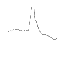

In [60]:
img

In [61]:
x=image.img_to_array(img)

In [62]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [63]:
import numpy as np
x=np.expand_dims(x,axis=0)

In [64]:
x.ndim

4

In [65]:
pred=model.predict(x)

In [66]:
pred

array([[0.05685496, 0.31686267, 0.2179027 , 0.12948245, 0.23561823,
        0.04327897]], dtype=float32)

In [67]:
pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 9.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [68]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"W6fG4VvGVvOiE0IeWjODgSAI_eXwi1YztFGQO0WkoJQ1"
}
client=APIClient(wml_credentials)

In [69]:
 client

In [70]:
def guid_space_name(client,animal_deploy):
    space=client.spaces.get_details()
    return(next (item for item in space["resources"] if item ['entity']['name']==animal_deploy)['metadata']['id'])

In [71]:
space_uid=guid_space_name(client,'data_set')
print ("space_UID"+space_uid)

space_UID758ad198-c1a1-421d-a00a-7670a7f86d09


In [72]:
client.set.default_space(space_uid)

'SUCCESS'

In [73]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [74]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [75]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [76]:
ls

arrhythmia.h5  data/


In [78]:
!tar -zcvf classification-of-arrhythmia-model.tgz arrhythmia.h5

arrhythmia.h5


In [80]:
model_details=client.repository.store_model(model='classification-of-arrhythmia-model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Model Building",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [81]:
model_id=client.repository.get_model_id(model_details)

In [82]:
model_id

'83d7b5e5-ee3c-449d-bf8a-e782261efab1'

In [84]:
client.repository.download(model_id,'arrhythmia.tar.gb')

Successfully saved model content to file: 'arrhythmia.tar.gb'


'/home/wsuser/work/arrhythmia.tar.gb'

In [85]:
ls

animal.tar.gb  arrhythmia.tar.gb                       data/
arrhythmia.h5  classification-of-arrhythmia-model.tgz
